In [0]:
!apt-get install -y libsm6 libxext6 && pip install  opencv-python
import cv2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


安裝open cv

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


LOAD DATA

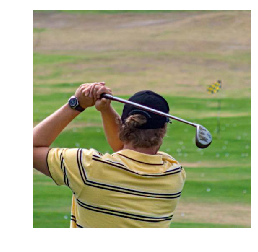

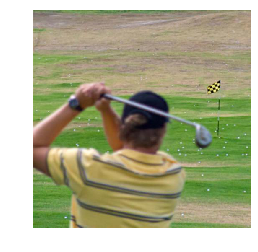

In [0]:

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgA = mpimg.imread("/content/drive/My Drive/Colab Notebooks/LytroDataset/lytro-01-A.jpg")
plt.imshow(imgA)
plt.axis('Off')
plt.show()
imgB = mpimg.imread("/content/drive/My Drive/Colab Notebooks/LytroDataset/lytro-01-B.jpg")
plt.imshow(imgB)
plt.axis('Off')
plt.show()

LOAD and SHOW image

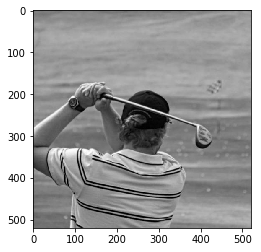

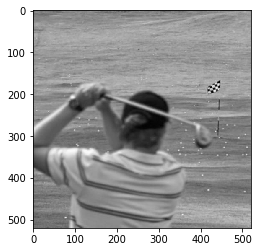

In [0]:
import numpy as np
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
imgAG = rgb2gray(imgA)    
plt.imshow(imgAG, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
plt.show()
imgBG = rgb2gray(imgB)    
plt.imshow(imgBG, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
plt.show()

GRAY image

In [0]:

H = np.array(( [-1 ,-1 ,-1], [-1, 8, -1], [-1, -1 ,-1]),np.float32)/9
    
G = np.array(
    ([0.0113437365584951,0.0838195058022106,0.0113437365584951],
     [0.0838195058022106,0.619347030557177,0.0838195058022106],
     [0.0113437365584951,0.0838195058022106,0.0113437365584951])
    ,np.float32)/9
    
aa = np.array(  
  ([   -2.5603   -2.0169   -2.0148   -2.0512   -1.9427   -1.8313   -1.7177   -1.5783   -1.7313],
   [-2.4371   -1.8957   -1.8875   -1.8915   -1.8934   -1.7398   -1.6521   -1.5611   -1.8569],
   [-2.2208   -1.8076   -1.8141   -1.9212   -1.8866   -1.7246   -1.5688   -1.2761   -1.5064],
   [-2.1076   -1.7486   -1.8201   -1.8529   -1.8224   -1.6559   -1.3054   -1.0815   -1.0741],
   [-2.2151   -1.8892   -1.7981   -1.8966   -1.7883   -1.5778   -1.3462   -1.0277   -1.2144],
   [-2.3236   -1.7960   -1.7916   -1.7907   -1.7926   -1.5538   -1.1976   -1.1675   -1.5252],
   [-2.4038   -1.7379   -1.5463   -1.5993   -1.6420   -1.4315   -1.1436   -1.3301   -1.8202],
   [-2.3531   -1.5939   -1.2775   -1.3605   -1.4261   -1.2783   -1.2289   -1.4526   -2.1021],
   [-2.3169   -1.4853   -1.1711   -1.2961   -1.4117   -1.3939   -1.3890   -1.6314   -2.0541])
    ,np.float32)

bb = np.array(
 ( [   -2.4523   -1.8978   -1.8908   -1.9884   -1.9664   -1.8620   -1.7977   -1.8786   -2.1955],
   [-2.1794   -1.5735   -1.5163   -1.6891   -1.7290   -1.7215   -1.7927   -1.9042   -2.1616],
   [-1.8657   -1.3724   -1.3687   -1.4949   -1.5469   -1.7349   -1.8195   -2.1009   -2.1418],
   [-1.4514   -1.3095   -1.3400   -1.4536   -1.5093   -1.6417   -1.8295   -1.9814   -2.0892],
   [-1.3478   -1.3890   -1.4599   -1.5576   -1.4782   -1.4812   -1.6990   -1.7946   -1.8780],
   [-1.3912   -1.3894   -1.5548   -1.5456   -1.4523   -1.3495   -1.5410   -1.5170   -1.7652],
   [-1.6032   -1.3776   -1.4958   -1.5207   -1.5138   -1.5814   -1.5887   -1.5940   -1.8155],
   [-1.5774   -1.2882   -1.2743   -1.3687   -1.5811   -1.6793   -1.6852   -1.7627   -2.0482],
   [-1.8729   -1.2574   -1.1999   -1.3012   -1.6252   -1.8951   -2.0944   -2.2369   -2.6554])
    ,np.float32)

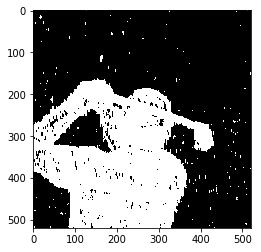

In [0]:
DA = np.array(imgAG,np.float32)
DB = np.array(imgBG,np.float32)
A = cv2.filter2D(DA,-1,H)
A = np.power(A,2)
A = cv2.filter2D(A,-1,G)
A = cv2.filter2D(A,-1,aa)
B = cv2.filter2D(DB,-1,H)
B = np.power(B,2)
B = cv2.filter2D(B,-1,G)
B = cv2.filter2D(B,-1,aa)
D =  np.array((B-A)>0,np.int8)
plt.imshow(D, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

gernate Decision map 

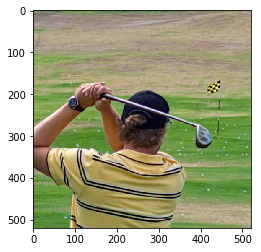

In [0]:
D3 = np.stack((D,D,D) , axis=2)
D31 = np.stack((1-D,1-D,1-D) , axis=2)
imgF = imgA*D3+imgB*D31
plt.imshow(imgF)
plt.show()

FUSION